In [1]:
%matplotlib inline
#
from os import chdir, getcwd
ROOTF = 'LRG-Signed'
if getcwd()[-len(ROOTF):] != ROOTF:
    chdir('../')
print('cwd:', getcwd())
#
from src.LRGSG_package.LRGSG import *

cwd: /home/giulio/PhD/projects/complex-networks/LRG-Signed


## Square lattice

In [86]:
side = 10
eigenmode_no = 0
#
theLattice = Lattice2D(#
    side1 = side,
    geometry = 'squared',
)
SLRG_obj = SignedLaplacianAnalysis(#
    system = theLattice,
    initCond = 'all_1', #f'ground_state_{eigenmode_no}'
    t_steps = 10,
    no_obs = 200
)
SLRG_obj.init_weights()
#
# neg_weightsG = {((i, j), (i, j+1)): -1 for i in range(SLRG_obj.system.side1) 
#                 for j in [SLRG_obj.system.side2//3, SLRG_obj.system.side2//2]}
neg_weightsH = {(SLRG_obj.system.N//2, SLRG_obj.system.N//2+1): -1}
SLRG_obj.flip_sel_edges(neg_weightsH, 'H')
#
# SLRG_obj.flip_sel_edges()
#
# SLRG_obj.flip_random_fract_edges()

In [5]:
side = 100
eigenmode_no = 0
#
themeanField = FullyConnected(#
    side1 = side,
)
SLRG_obj = SignedLaplacianAnalysis(#
    system = themeanField,
    initCond = 'all_1', #f'ground_state_{eigenmode_no}'
    pflip= 0.2,
    t_steps = 10,
    no_obs = 200
)
SLRG_obj.init_weights()
#
# neg_weightsG = {((i, j), (i, j+1)): -1 for i in range(SLRG_obj.system.side1) 
#                 for j in [SLRG_obj.system.side2//3, SLRG_obj.system.side2//2]}
# neg_weightsH = {(SLRG_obj.system.N//2, SLRG_obj.system.N//2+1): -1}
# SLRG_obj.flip_sel_edges(neg_weightsH, 'H')
#
# SLRG_obj.flip_sel_edges()
#
SLRG_obj.flip_random_fract_edges()

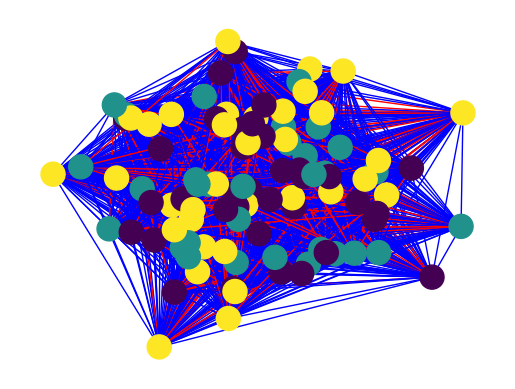

In [6]:
fig, ax = plt.subplots()

G = SLRG_obj.system.G
status = np.random.randint(-1, 2, themeanField.N)
G_nodecol = status
G_edgecol = ['b' if e[2]['weight'] >0 else 'r' for e in G.edges(data=True)]
pos = signed_spectral_layout(G)
nx.draw(G, ax=ax, pos=pos, edge_color=G_edgecol, node_color=G_nodecol)

In [7]:
lapl = nx.laplacian_matrix(G)
adj = nx.to_scipy_sparse_array(G, weight='weight', format="csr").toarray()
deg = np.diag(adj.sum(axis=1))
sdeg = np.diag(np.abs(adj).sum(axis=1))
slapl = sdeg-adj

In [8]:
print("initstatus", status)
eigv0 = np.linalg.eigh(slapl)[0][0]
statusarr = []
for t in range(100):
    statusarr.append(status/np.min(status))
    status = status - 0.01*(slapl-eigv0)@status

initstatus [ 1  0  0 -1  0  0  1  0  1  0 -1  0 -1 -1  1  0  1  1 -1 -1  1 -1  0  1
 -1  1  1  1  1  1  1 -1 -1  0  0  0  0  0 -1  1  1 -1  0  1 -1  0 -1 -1
  0 -1 -1 -1 -1  0  1 -1  0  0 -1  0  1  1  1 -1  1  0 -1 -1  0  0 -1  1
 -1 -1  1  1  0  1  0 -1 -1  1  0  1 -1  1 -1 -1  1 -1 -1  0  1  1  0  1
  0  0 -1  1]


In [9]:
G_nodecol = status/np.min(status)
G_nodecol

array([0.99644752, 0.99746644, 0.9979777 , 0.99543663, 0.99746696,
       0.99797123, 0.9959466 , 0.99645322, 0.99137831, 0.99594738,
       0.99340321, 0.99340735, 0.99390879, 0.99493106, 0.99493674,
       0.9959448 , 0.99493571, 0.9954413 , 0.99594481, 0.99189192,
       0.99543923, 0.99341227, 0.99086654, 0.99544415, 0.99441798,
       0.99442238, 0.99391447, 0.99848199, 0.99695672, 0.99391138,
       0.99391888, 1.        , 0.9979728 , 0.99492847, 0.99645011,
       0.99797848, 0.99290308, 0.99644882, 0.99442289, 0.99340296,
       0.99645479, 0.99493444, 0.99340216, 0.99391345, 0.99798029,
       0.99340553, 0.99645295, 0.99441487, 0.99645424, 0.99746929,
       0.99544258, 0.99543586, 0.99645192, 0.99391447, 0.99340243,
       0.99289608, 0.99696164, 0.99594066, 0.99644571, 0.99593756,
       0.99442056, 0.99442341, 0.9959448 , 0.99949856, 0.99746721,
       0.99188598, 0.99745841, 0.99492691, 0.98985253, 0.99594427,
       0.99239594, 0.99340838, 0.99340993, 0.99492278, 0.99340

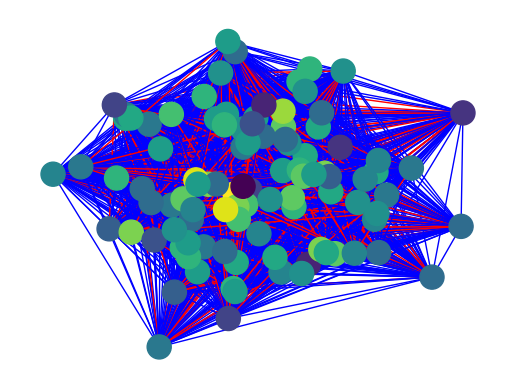

In [10]:
fig, ax = plt.subplots()


pos = signed_spectral_layout(G)

G_edgecol = ['b' if e[2]['weight'] >0 else 'r' for e in G.edges(data=True)]
nx.draw(G, ax=ax, pos=pos,  edge_color=G_edgecol, node_color=G_nodecol)
plt.show()

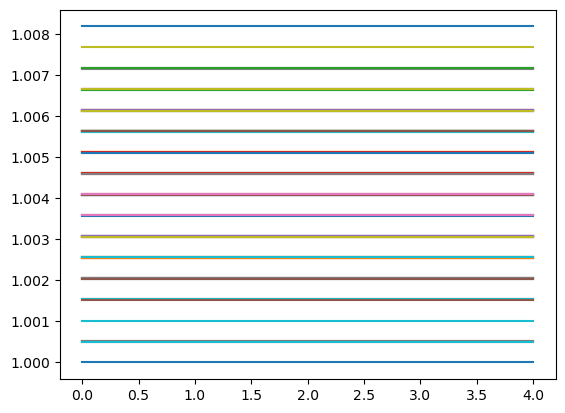

In [70]:
for agent in np.array(statusarr).T:
    plt.plot(agent[5:10])
# plt.yscale('symlog')


In [63]:
np.linalg.eigh(slapl)[0][0]

19.344362192425816

In [35]:
lapl

<7x7 sparse matrix of type '<class 'numpy.int64'>'
	with 49 stored elements in Compressed Sparse Row format>

In [36]:
lapl.toarray()

array([[ 6, -1, -1, -1, -1, -1, -1],
       [-1,  6, -1, -1, -1, -1, -1],
       [-1, -1,  6, -1, -1, -1, -1],
       [-1, -1, -1,  6, -1, -1, -1],
       [-1, -1, -1, -1,  6, -1, -1],
       [-1, -1, -1, -1, -1,  6, -1],
       [-1, -1, -1, -1, -1, -1,  6]])

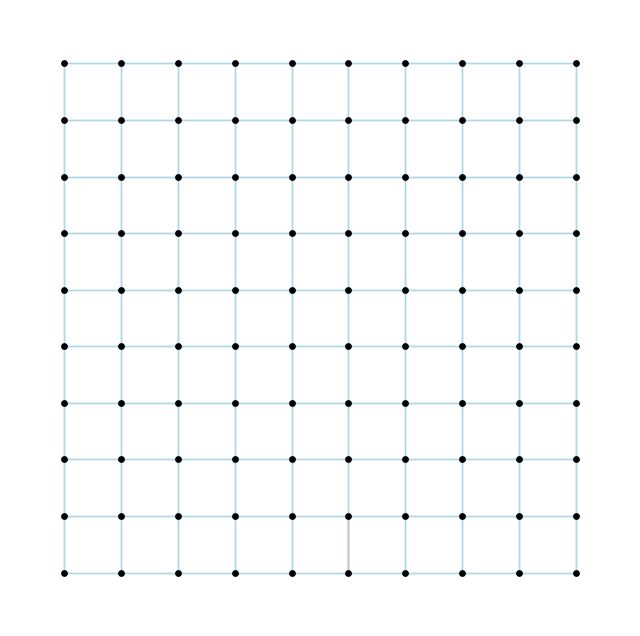

In [20]:
G_edges_ww = SLRG_obj.system.G.edges(data='weight')
edgecol = ['lightblue' if e[2] > 0 else 'r' for e in G_edges_ww]

fig, ax = plt.subplots(figsize=(8, 8))
nx.draw(theLattice.G, 
        pos=theLattice.posG, 
        ax=ax,  
        edge_color=edgecol, 
        node_color='k',  
        node_size=15,
        with_labels=False)

In [9]:
SLRG_obj.laplacian_dynamics_init(
    window_size=1, 
    window_shift_y=0,
    window_shift_x=0,
    win_val=-1)
#
initial_state = SLRG_obj.status_array.reshape(SLRG_obj.syshape)
eigen_state = SLRG_obj.eigV.T[eigenmode_no].reshape(SLRG_obj.syshape)

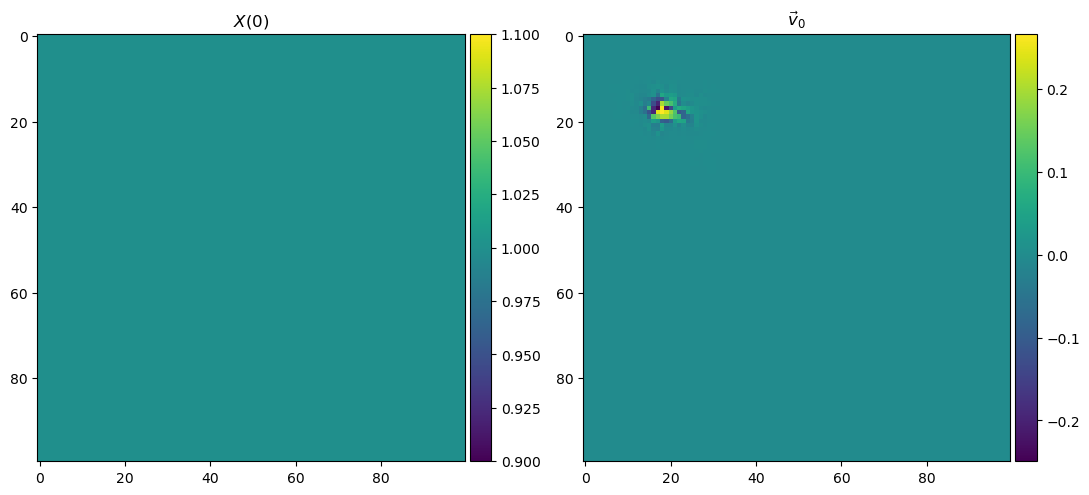

In [79]:
fig, axs = plt.subplots(1, 2, figsize=(11, 5))
#
im1 = axs[0].imshow(initial_state)
_ = imshow_colorbar_caxdivider(im1, axs[0])
axs[0].set_title(r'$X(0)$')
#
im3 = axs[1].imshow(eigen_state)
_ = imshow_colorbar_caxdivider(im3, axs[1])
axs[1].set_title(r'$\vec{v}_0$')
#
fig.tight_layout()

In [80]:
SLRG_obj.run_laplacian_dynamics(
    rescaled=False,
    saveFrames=True)
final_state = SLRG_obj.status_array.reshape(SLRG_obj.system.side1, SLRG_obj.system.side2)

Beginning Laplacian dynamics.


 11%|█         | 10544/100000 [00:01<00:09, 9461.04it/s]

Max val. reached.


In [81]:
SLRG_obj.compute_k_eigvV(howmany=8)
SLRG_obj.eigv

array([0.42601165, 0.42805741, 0.43662535, 0.44802016, 0.45053231,
       0.45284314, 0.45558837, 0.45657061])

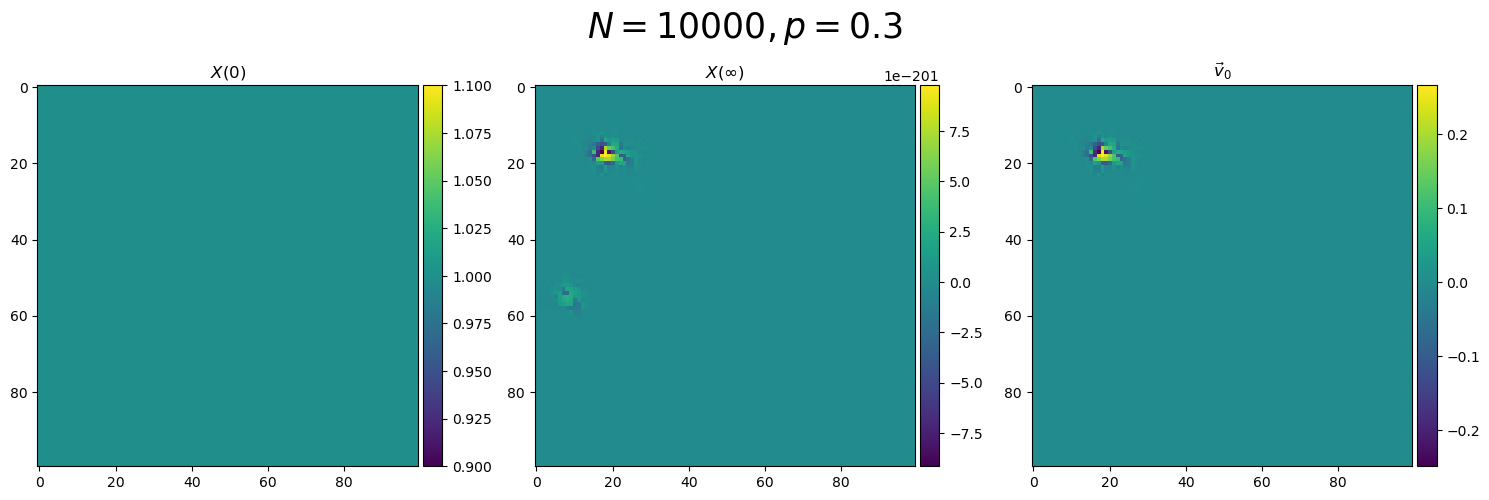

In [82]:
if np.mean(initial_state)*np.mean(eigen_state) < 0:
    eigen_state = -eigen_state
#
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
#
im1 = axs[0].imshow(initial_state)
_ = imshow_colorbar_caxdivider(im1, axs[0])
axs[0].set_title(r'$X(0)$')
#
im2 = axs[1].imshow(final_state)
_ = imshow_colorbar_caxdivider(im2, axs[1])
axs[1].set_title(r'$X(\infty)$')
#
im3 = axs[2].imshow(eigen_state)
_ = imshow_colorbar_caxdivider(im3, axs[2])
axs[2].set_title(r'$\vec{v}_0$')
#
fig.suptitle(fr'$N={SLRG_obj.system.N}, p={SLRG_obj.pflip:.3g}$', fontsize=25)
fig.tight_layout()

In [83]:
np.sum(initial_state), np.sum(final_state)

(10000.0, 5.810300360048152e-200)

In [84]:
array_200x100x100 = np.array(SLRG_obj.frames_dynsys).reshape(SLRG_obj.frames_dynsys.__len__(), SLRG_obj.system.N).T

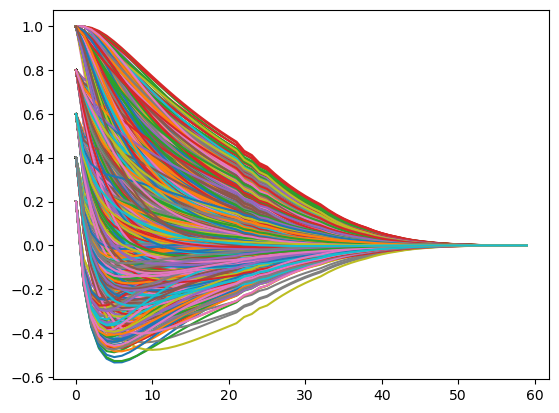

In [85]:
for arr in array_200x100x100:
    plt.plot(arr[:60])
# plt.yscale('symlog')

# plt.ylim(bottom=1e-15)

# of frames:  173


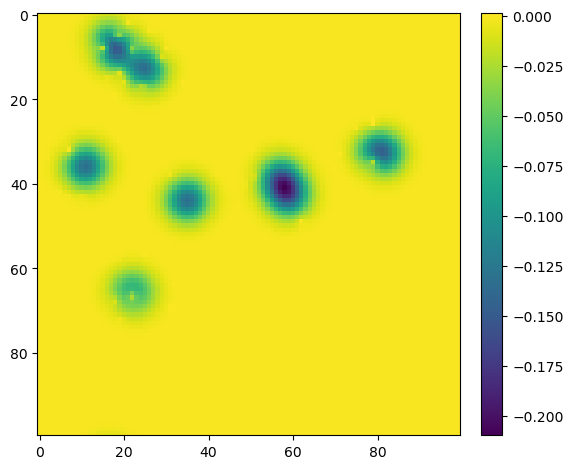

In [20]:
make_animation_fromFrames(SLRG_obj.frames_dynsys, fps=10, savename="dynamic_normal_2.mp4")

In [10]:
L = SLRG_obj.system.side1
status = SLRG_obj.status_array.reshape(L, L)/SLRG_obj.status_array.sum()
halfsize = L//2
hcut_halfsize = status[halfsize, :]
vcut_halfsize = status[:, halfsize]
critrad = np.sqrt(1.128/(3.14*0.103))
ball_halfsizeM = halfsize+1-critrad
ball_halfsizeP = halfsize+1+critrad

plt.rc('font', size=12)
plt.rc('axes', labelsize=20)
plt.rc('axes', titlesize=20)
cax_dict = {"size": "5%", "pad":0.2}
axvline_cr = {"ls": ":", "color": "red"}
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
fig, ax1 = plt.subplots(figsize=(7.5, 7))
#


ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax1.set_title(r"$\phi(\vec{x}, t=\infty)$")
#
phi_plot = status
phi_plot = np.log10(np.max(status)-status)
phi_plot_nnans = phi_plot[(phi_plot != np.inf) & (phi_plot != -np.inf)]
phi_plot = np.nan_to_num(phi_plot, posinf=np.max(phi_plot_nnans), neginf=np.min(phi_plot_nnans))
im1 = ax1.imshow(phi_plot, cmap=plt.cm.hot, aspect="auto")
#
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", **cax_dict)
clb = fig.colorbar(im1, cax=cax)
#
#
circ = Circle((L//2,L//2),critrad, alpha=0.5, lw=2)
ax1.add_patch(circ)
circ = Circle((L//2,L//2),25, ls='--', lw=1, color='k', fill=False)
ax1.add_patch(circ)
circ = Circle((L//2,L//2),1.0187186, alpha=0.5, lw=2, color='red')
ax1.add_patch(circ)

fig.tight_layout(pad=5.0)
fig.savefig(r"ball.pdf", bbox_inches='tight', transparent=True
            )

/tmp/ipykernel_25915/4016633386.py:30: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sample = rd.sample(H.nodes, N)
100%|██████████| 100/100 [00:20<00:00,  4.93it/s]


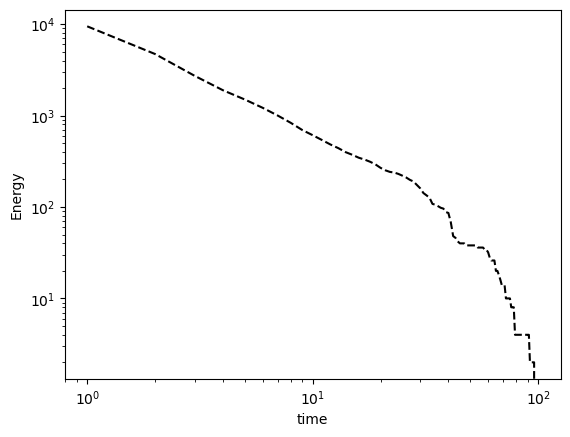

In [11]:
# for i in range(19):
#     plt.plot(np.linspace(1, len(bigene[i]), num=len(bigene[i])), bigene[i]+ np.max(np.abs(bigene[-1])))
plt.plot(np.linspace(1, len(bigene[-1]), num=len(bigene[-1])), bigene[-1] + np.max(np.abs(bigene[-1])), c='k', ls='--')
plt.xscale('log')
plt.ylabel('Energy')
plt.xlabel('time')
# plt.ylim([1,1e3])
# 
plt.yscale('log')

In [12]:
sum([1 for i in H.edges(data='weight') if i[2] < 0])

200

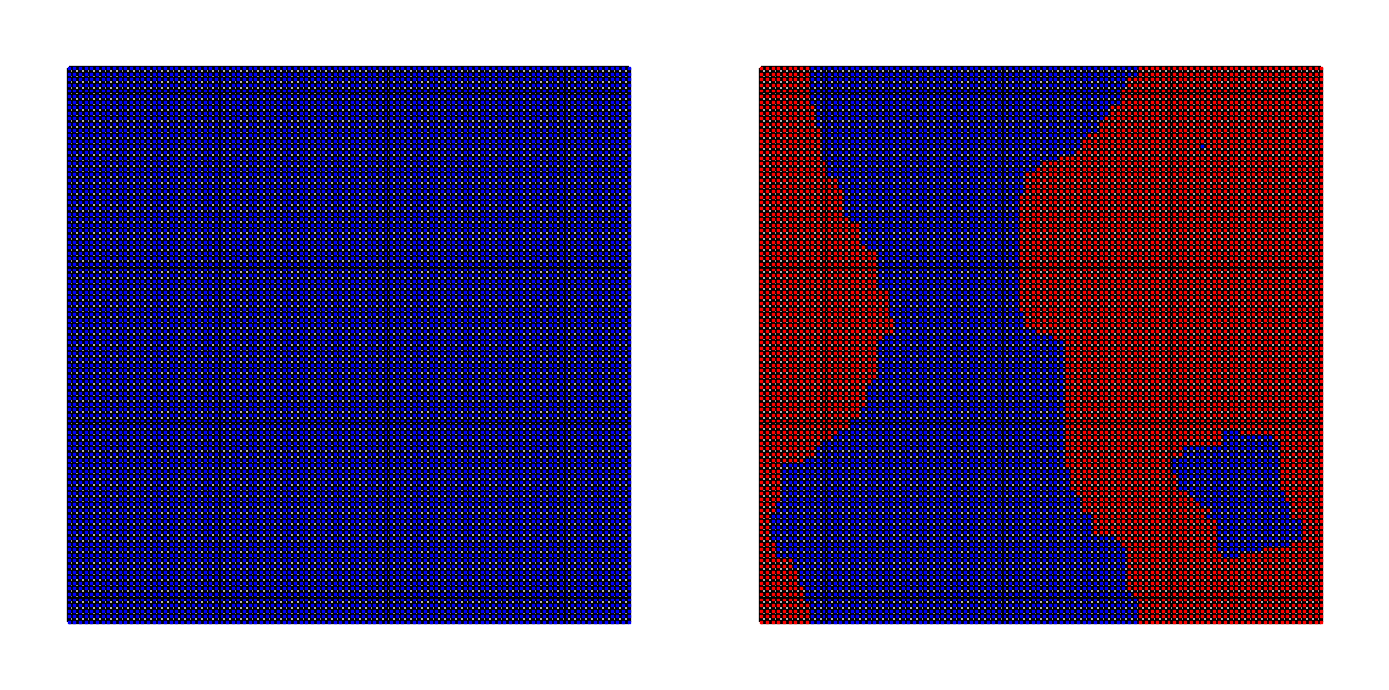

In [13]:
mapping = {old_label:new_label 
           for new_label, old_label in enumerate(SLRG_obj.system.G.nodes())}
Im=np.zeros((SLRG_obj.syshape))
for i1 in range(N):
    Node=list(mapping)[i1]
    if ((m[i1])==1): 
        Im[Node[1], Node[0]]=-1
    if ((m[i1])==-1): 
        Im[Node[1],Node[0]]=1

pos = SLRG_obj.system.posH
listam=['red' if i >0 else 'blue' for i in m]

from matplotlib import colors
# cmap = colors.ListedColormap(['darkblue', 'red'])
fig, (ax, ax1) = plt.subplots(ncols=2, figsize=(14, 7))
plt.subplots_adjust(wspace=None)
nx.draw(H, pos=pos, node_size=2, width=3, ax=ax, node_color=lista, node_shape="s")
nx.draw(H, pos=pos, node_size=2, width=3, ax=ax1, node_color=listam, node_shape="s")
# im = ax1.imshow(Im,interpolation=None,cmap=cmap, origin='lower')
# fig.colorbar(im, ax=ax1)
fig.tight_layout()

In [ ]:

# Create a random matrix for plotting
np.random.seed(42)
matrix = np.random.rand(100, 100)

# Create a figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the data using imshow and add colorbars
im1 = axs[0].imshow(matrix, cmap='viridis')
axs[0].set_title('Plot 1')

im2 = axs[1].imshow(matrix, cmap='plasma')
axs[1].set_title('Plot 2')

im3 = axs[2].imshow(matrix, cmap='inferno')
axs[2].set_title('Plot 3')

# Create colorbars on the right side of each subplot
divider1 = make_axes_locatable(axs[0])
cax1 = divider1.append_axes("right", size="5%", pad=0.05)
colorbar1 = plt.colorbar(im1, cax=cax1)

divider2 = make_axes_locatable(axs[1])
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
colorbar2 = plt.colorbar(im2, cax=cax2)

divider3 = make_axes_locatable(axs[2])
cax3 = divider3.append_axes("right", size="5%", pad=0.05)
colorbar3 = plt.colorbar(im3, cax=cax3)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [ ]:
L = SLRG_obj.system.side1
status = SLRG_obj.status_array.reshape(L, L)/SLRG_obj.status_array.sum()
halfsize = L//2
hcut_halfsize = status[halfsize, :]
vcut_halfsize = status[:, halfsize]
critrad = np.sqrt(1.128/(3.14*0.103))
ball_halfsizeM = halfsize+1-critrad
ball_halfsizeP = halfsize+1+critrad

plt.rc('font', size=12)
plt.rc('axes', labelsize=20)
plt.rc('axes', titlesize=20)
cax_dict = {"size": "5%", "pad":0.2}
axvline_cr = {"ls": ":", "color": "red"}
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
fig, ax1 = plt.subplots(figsize=(7.5, 7))
#


ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax1.set_title(r"$\phi(\vec{x}, t=\infty)$")
#
phi_plot = status
phi_plot = np.log10(np.max(status)-status)
phi_plot_nnans = phi_plot[(phi_plot != np.inf) & (phi_plot != -np.inf)]
phi_plot = np.nan_to_num(phi_plot, posinf=np.max(phi_plot_nnans), neginf=np.min(phi_plot_nnans))
im1 = ax1.imshow(phi_plot, cmap=plt.cm.hot, aspect="auto")
#
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", **cax_dict)
clb = fig.colorbar(im1, cax=cax)
#
#
circ = Circle((L//2,L//2),critrad, alpha=0.5, lw=2)
ax1.add_patch(circ)
circ = Circle((L//2,L//2),25, ls='--', lw=1, color='k', fill=False)
ax1.add_patch(circ)
circ = Circle((L//2,L//2),1.0187186, alpha=0.5, lw=2, color='red')
ax1.add_patch(circ)

fig.tight_layout(pad=5.0)
fig.savefig(r"ball.pdf", bbox_inches='tight', transparent=True
            )

In [ ]:
SLRG_obj.system.G.edges(data=True)

In [ ]:
plt.imshow(status)

## Triangular lattice

In [ ]:
side = 30
plotside = side if side < 10 else 10
#
theLattice = Lattice2D(#
    side1 = side,
    side2 = int(side * np.sqrt(3)),
    geometry = 'triangular',
)
plotlattice = Lattice2D(#
    side1 = plotside,
    side2 = int(plotside * np.sqrt(3)),
    geometry = 'triangular',
    pbc = False
)
SLRG_obj = SignedLaplacianAnalysis(#
    system = theLattice,
)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
nx.draw(plotlattice.H, 
        pos=plotlattice.posH, 
        ax=ax,  
        edge_color='lightgray', 
        node_color='k',  
        node_size=15,
        with_labels=False)
plt.show()

In [ ]:
SLRG_obj.laplacian_dynamics_init()
SLRG_obj.upd_graph_matrices()

In [ ]:
SLRG_obj.run_laplacian_dynamics()

In [ ]:
cax_dict = {"size": "5%", "pad":0.2}
axvline_cr = {"ls": ":", "color": "red"}
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
pos = nx.get_node_attributes(H, 'pos')

x, y = np.array([i[1] for i in list(pos.items())]).T
fig, ax1 = plt.subplots(figsize=(6, 6*np.max(y)/np.max(x)))
#

ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax1.set_title(r"$\phi(\vec{x}, t=\infty)$")
#
# phi_plot = status_array
status_array = np.abs(status_array)
field = np.log(np.max(status_array)-status_array)
# phi_plot = np.log10(np.max(status)-status)
# phi_plot_nnans = phi_plot[(phi_plot != np.inf) & (phi_plot != -np.inf)]
# phi_plot = n# parameters

im1 = ax1.hexbin(x, y, C=field, cmap=plt.cm.hot, gridsize=70, edgecolor = "k", lw=.2)
#
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", **cax_dict)
clb = fig.colorbar(im1, cax=cax)
#
# circ = Circle((L//2,L//2),critrad, alpha=0.5, lw=2)
# ax1.add_patch(circ)
# circ = Circle((L//2,L//2),25, ls='--', lw=1, color='k', fill=False)
# ax1.add_patch(circ)
# circ = Circle((L//2,L//2),1.0187186, alpha=0.5, lw=2, color='red')
# ax1.add_patch(circ)

fig.tight_layout(pad=5.0)
fig.savefig(r"ball.pdf", bbox_inches='tight', transparent=True
            )

In [ ]:
# parameters
initial_cond = 'gauss_1'
BC_choice = 'PBC'
#
L = 10
t_steps = 10
no_obs = 5
fbc_val = 1
#
Deltat = 1/t_steps
simulationTime = L**2*t_steps
sampling = 1*t_steps
frames = simulationTime // sampling
#
frames_dynsys = []

In [ ]:
G = nx.triangular_lattice_graph(L, L, periodic=False, with_positions=True)
nN = G.nodes().__len__()
neg_weightsH = {(nN//2, nN//2+1): -1}
#
nx.set_edge_attributes(G, values=1, name='weight')

H = nx.convert_node_labels_to_integers(G)
nx.set_edge_attributes(H, values=neg_weightsH, name='weight')

In [ ]:
# parameters
initial_cond = 'gauss_1'
BC_choice = 'PBC'
#
L = 80
t_steps = 10
no_obs = 5
fbc_val = 1
#
Deltat = 1/t_steps
simulationTime = L**2*t_steps
sampling = 1*t_steps
frames = simulationTime // sampling
#
frames_dynsys = []

In [ ]:
G = nx.triangular_lattice_graph(L, int(L*np.sqrt(3)), periodic=False, with_positions=True)
nN = G.nodes().__len__()
neg_weightsH = {(nN//2, nN//2+1): -1}
# neg_weightsH = {(663, 690): -1}
fraction_to_flip = 0.07
#
nx.set_edge_attributes(G, values=1, name='weight')
# flip_random_fract_edges(G, fraction_to_flip)
H = nx.convert_node_labels_to_integers(G)
nx.set_edge_attributes(H, values=neg_weightsH, name='weight')

In [ ]:
adj = nx.adjacency_matrix(H).toarray()
dia = np.diag(adj.sum(axis=1))
lapl = dia - adj
diabs = np.diag(np.abs(adj).sum(axis=1))
slapl = diabs - adj
eigv, eigV = np.linalg.eigh(slapl)

In [ ]:
status_array = np.random.normal(0, 1, H.number_of_nodes())

In [ ]:
# status_array = status_array/status_array.sum()
for t in range(250):
    if (t % sampling == 0):
        print(t, np.mean(status_array), np.var(status_array))
    status_array = status_array - Deltat*((slapl - eigv[0])@status_array) #+ np.sqrt(Deltat)*np.random.uniform(-1e-3, 1e-3, L**2)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
pos = nx.get_node_attributes(H, 'pos')
# Pass the positions while drawing
Hedges = list(H.edges(data=True))
Gedges = list(G.edges(data=True))

edge_colorH = ['red' if d['weight'] == -1 else 'black' for u,v,d in Hedges]
# nx.draw(H, pos=pos, ax=ax,  with_labels=False, node_size=20, edge_color = edge_colorH)

In [ ]:
cax_dict = {"size": "5%", "pad":0.2}
axvline_cr = {"ls": ":", "color": "red"}
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
pos = nx.get_node_attributes(H, 'pos')

x, y = np.array([i[1] for i in list(pos.items())]).T
fig, ax1 = plt.subplots(figsize=(7, 7*np.max(y)/np.max(x)))
#

ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax1.set_title(r"$\phi(\vec{x}, t=\infty)$")
#
# phi_plot = status_array
status_array = np.abs(status_array)
field = np.log(np.max(status_array)-status_array)
# phi_plot = np.log10(np.max(status)-status)
# phi_plot_nnans = phi_plot[(phi_plot != np.inf) & (phi_plot != -np.inf)]
# phi_plot = n# parameters

im1 = ax1.hexbin(x, y, C=field, cmap=plt.cm.hot, gridsize=70, edgecolor = "w", lw=.01)
#
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", **cax_dict)
clb = fig.colorbar(im1, cax=cax)
#
# circ = Circle((L//2,L//2),critrad, alpha=0.5, lw=2)
# ax1.add_patch(circ)
# circ = Circle((L//2,L//2),25, ls='--', lw=1, color='k', fill=False)
# ax1.add_patch(circ)
# circ = Circle((L//2,L//2),1.0187186, alpha=0.5, lw=2, color='red')
# ax1.add_patch(circ)

fig.tight_layout(pad=5.0)
fig.savefig(r"ball.pdf", bbox_inches='tight', transparent=True
            )

In [ ]:
starr0 = field[nN//2-L//2:nN//2+L//2]
starr = field[nN//2+1:nN//2+L//2]
x = np.array(list(range(0, len(starr0))))
params, cov = curve_fit(line, x[40:65], starr0[40:65])
plt.plot(starr0, 'o')
plt.plot(x[40:76], line(x[40:76], *params), label=rf"fit, $r_{{\rm c}} = {np.abs(params[0]):.2f}$")
plt.xlabel(r"distance from perturbation $d$")
plt.legend()
plt.ylabel(r"$\phi(\infty) - \phi(d, L/2, t=\infty)$", color='black')

params[0]

In [ ]:
column_index = 40  # Half of the horizontal length

# Extract the indices of nodes belonging to the same column
column_indices = np.array([node_id for node_id, pos in nx.get_node_attributes(H, 'pos').items() if pos[0] == column_index])
x = np.array(list(range(0, 2*len(field[column_indices]), 2)))
plt.plot(x, field[column_indices], 'o')

params, cov = curve_fit(line, x[22:37], field[column_indices][22:37])

plt.plot(x[20:40], line(x[20:40], *params),  label=rf"fit, $r_{{\rm c}} = {np.abs(params[0]):.2f}$")
plt.xlabel(r"distance from perturbation $d$")
plt.legend()
plt.ylabel(r"$\phi(\infty) - \phi(d, L/2, t=\infty)$", color='black')
params[0]

In [ ]:
np.sqrt(3)/2

In [ ]:
if initial_cond == 'uniform_1':
    status_array = np.random.uniform(-1, 1, nN)#np.ones(L**2)
elif initial_cond == 'delta_1':
    status_array = np.zeros(L**2)
    status_array[L**2//2] = L**2
elif initial_c# parameters
initial_cond = 'gauss_1'
BC_choice = 'PBC'
#
L = 100
t_steps = 10
no_obs = 5
fbc_val = 1
#
Deltat = 1/t_steps
simulationTime = L**2*t_steps
sampling = 1*t_steps
frames = simulationTime // sampling
#
frames_dynsys = []ond == 'gauss_1':
    status_array = np.random.normal(0, 1, nN)
elif initial_cond.startswith('ground_state'):
    eigenMode = int(initial_cond.split('_')[-1])
#
if BC_choice == 'FBC':
    # fixed_border_idxs = np.array(list(set(
    #                   np.concatenate([[i for i in range(L)], 
    #                         [i for i in range(L**2) if i % L ==0], 
    #         # parameters
initial_cond = 'gauss_1'
BC_choice = 'PBC'
#
L = 100
t_steps = 10
no_obs = 5
fbc_val = 1
#
Deltat = 1/t_steps
simulationTime = L**2*t_steps
sampling = 1*t_steps
frames = simulationTime // sampling
#
frames_dynsys = []                [i for i in range(L**2) if (i+1) % (L) ==0],
    #                         [i for i in range(L**2-L, L**2)]]))))
    fixed_border_idxs = np.array(sorted([i for i in range(L)] + \
                [(L-1) * L + i for i in range(L)] + \
                [i * L for i in range(1, L-1)] + 
                [(i+1) * L - 1 for i in range(1, L-1)]))
    status_array[fixed_border_idxs] = fbc_val

In [ ]:
# status_array = status_array/status_array.sum()
for t in range(250):
    status_array_old = status_array
    if (t % sampling == 0):
        print(t, np.mean(status_array), np.var(status_array))
    status_array = status_array - Deltat*((slapl - eigv[0])@status_array) #+ np.sqrt(Deltat)*np.random.uniform(-1e-3, 1e-3, L**2)
    if BC_choice == 'FBC':
        status_array[fixed_border_idxs] = fbc_val
    # if (np.abs(status_array_old - status_array) < 1e-7*np.ones(L**2)).all():
    #     print('Convergence rea\ched')
    #     break

In [ ]:
plt.rc('font', size=12)
plt.rc('axes', labelsize=20)
plt.rc('axes', titlesize=20)
cax_dict = {"size": "5%", "pad":0.2}
axvline_cr = {"ls": ":", "color": "red"}
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
x, y = np.array([i[1] for i in list(pos.items())]).T
fig, ax1 = plt.subplots(figsize=(6, 6*np.max(y)/np.max(x)))
#

ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax1.set_title(r"$\phi(\vec{x}, t=\infty)$")
#
# phi_plot = status_array
status_array = np.abs(status_array)
field = np.log(np.max(status_array)-status_array)
# phi_plot = np.log10(np.max(status)-status)
# phi_plot_nnans = phi_plot[(phi_plot != np.inf) & (phi_plot != -np.inf)]
# phi_plot = n# parameters
initial_cond = 'gauss_1'
BC_choice = 'PBC'
#
L = 100
t_steps = 10
no_obs = 5
fbc_val = 1
#
Deltat = 1/t_steps
simulationTime = L**2*t_steps
sampling = 1*t_steps
frames = simulationTime // sampling
#
frames_dynsys = []#p.nan_to_num(phi_plot, posinf=np.max(phi_plot_nnans), neginf=np.min(phi_plot_nnans))
im1 = ax1.hexbin(x, y, C=field, cmap=plt.cm.hot, gridsize=50, edgecolor = "k", lw=.2)
#
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", **cax_dict)
clb = fig.colorbar(im1, cax=cax)
#
# circ = Circle((L//2,L//2),critrad, alpha=0.5, lw=2)
# ax1.add_patch(circ)
# circ = Circle((L//2,L//2),25, ls='--', lw=1, color='k', fill=False)
# ax1.add_patch(circ)
# circ = Circle((L//2,L//2),1.0187186, alpha=0.5, lw=2, color='red')
# ax1.add_patch(circ)

fig.tight_layout(pad=5.0)
fig.savefig(r"ball.pdf", bbox_inches='tight', transparent=True
            )

In [ ]:
starr = field[nN//2:nN//2+26]

In [ ]:
plt.plot(starr, 'o')
x = np.array(list(range(0, len(starr))))
params, cov = curve_fit(line, x, starr)
plt.plot(x, line(x, *params), label=rf"fit, $r_{{\rm c}} = {np.abs(params[0]):.2f}$")
plt.xlabel(r"distance from perturbation $d$")
plt.legend()
plt.ylabel(r"$\phi(\infty) - \phi(d, L/2, t=\infty)$", color='black')

params[0]

In [ ]:
column_index = 25  # Half of the horizontal length

# Extract the indices of nodes belonging to the same column
column_indices = np.array([node_id for node_id, pos in nx.get_node_attributes(H, 'pos').items() if pos[0] == column_index])
plt.plot(field[column_indices][25:50], 'o')
x = np.array(list(range(0, len(field[column_indices][25:40]))))

params, cov = curve_fit(line, x, field[column_indices][25:40])

plt.plot(x, line(x, *params),  label=rf"fit, $r_{{\rm c}} = {np.abs(params[0]):.2f}$")
plt.xlabel(r"distance from perturbation $d$")
plt.legend()
plt.ylabel(r"$\phi(\infty) - \phi(d, L/2, t=\infty)$", color='black')
params[0]

In [ ]:
plt.plot(field[column_indices])


In [ ]:
status_array

In [ ]:
triangular_array = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

# Define the dimensions of the triangular grid
n = 3  # Number of rows in the grid
m = 4  # Number of columns in the grid

# Calculate the index of the vertical line at half of the horizontal length
line_index = m // 2

# Calculate the index range of the elements passing through the vertical line
start_index = line_index * (n - 1)
end_index = (line_index + 1) * (n - 1) + 1

# Extract the elements passing through the vertical line
line_elements = triangular_array[start_index:end_index]


In [ ]:
line_elements
plt.hexbin(x, y, C=triangular_array, cmap=plt.cm.hot, gridsize=50)

In [ ]:
# Assuming you have a 1D array representing the elements on a triangular lattice
triangular_array = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

# Define the dimensions of the triangular grid
n = 3  # Number of rows in the grid
m = 4  # Number of columns in the grid

# Calculate the index of the vertical line at half of the horizontal length
line_index = m // 2

# Calculate the number of elements in the rows above the vertical line
elements_above_line = (n - 1) * line_index

# Calculate the number of elements in the rows below the vertical line
elements_below_line = (n - 1) * (m - line_index)

# Calculate the start index of the elements passing through the vertical line
start_index = elements_above_line + elements_below_line

# Calculate the end index of the elements passing through the vertical line
end_index = start_index + n

# Extract the elements passing through the vertical line
line_elements = triangular_array[start_index:end_index]



In [ ]:
L = 9
LL = 9
G = nx.triangular_lattice_graph(L, LL, periodic=False, with_positions=True, create_using=None)
Gg = nx.convert_node_labels_to_integers(G)
fig, ax = plt.subplots(figsize=(6, 8))
pos = nx.get_node_attributes(Gg, 'pos')
neg_weightsGg = {(19, 24): -1}
nx.set_edge_attributes(Gg, values=1, name='weight')
nx.set_edge_attributes(Gg, values=neg_weightsGg, name='weight')
Ggedges = list(Gg.edges(data=True))
edge_colorGg = ['red' if d['weight'] == -1 else 'black' for u,v,d in Ggedges]
nx.draw(Gg, pos=pos, ax=ax,  with_labels=False, node_size=20, edge_color=edge_colorGg)

In [ ]:
column_indices = [node_id for node_id, pos in nx.get_node_attributes(Gg, 'pos').items() if pos[0] == 2]
column_indices

In [ ]:
# Assuming you have created a triangular grid using networkx
n = 3  # Number of rows in the grid
m = 4  # Number of columns in the grid
G = nx.triangular_lattice_graph(n, m)

# Define the column index you want to extract
column_index = L // 2  # Half of the horizontal length

# Extract the indices of nodes belonging to the same column
column_indices = [node_id for node_id, pos in nx.get_node_attributes(Gg, 'pos').items() if pos[0] == column_index]

print(column_indices)
pos = nx.get_node_attributes(Gg, 'pos')
fig, ax = plt.subplots(figsize=(6, 8))

nx.draw(Gg, pos=pos, ax=ax,  with_labels=True, node_size=20)

In [ ]:
column_index

In [ ]:
nx.get_node_attributes(Gg, 'pos').items()